In [1]:
#load package
.libPaths(c("/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3/envs/r4.1.2/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3_2/envs/Rsplot/lib/R/library"))
library(data.table)
library(qs)
library(GenomicRanges)
library(GenomicFeatures)
library(rtracklayer)
library(dplyr)
library(ggbio)
library(reshape2)
library(ggsci)
library(viridis)
library(ggpubr)
library(circlize)
library(ggh4x)
library(ggtranscript)
library(khroma)
library(randomcoloR)
library(bambu)
library(ggdensity)
library(Seurat)
library(scCustomize)
library(ComplexUpset)
library(ComplexHeatmap)

qs 0.25.5

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: I

In [3]:
#load data
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/")
MySplit = function(str,sep, n){
  return(unlist(lapply(strsplit(str,sep),"[[",n)))
}
# cellan = read.csv("../ref/cell_type_type20230220-macaque1-contour2_v1.csv")
# cellan = unique(cellan[,c("subclass","class")])
# areaan = read.csv("../ref/area_annotation.csv")
gtf = rtracklayer::import("ref/bambu_extended_annotations_novelname.gtf")
areaan = unique(areaan[c("L0","L3")])
colnames(areaan) = c("lobe","area")
areaan[areaan$area == "1/2",]$area = "1|2"
gtfh = rtracklayer::import("ref/bambu_extended_annotations_novelname.gtf")

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'unique': object 'areaan' not found


In [12]:
fsraw = qread("data/reads_full_anotation/read_total_annotation_nobackground_24_08_22.qs")
unique(fsraw[fsraw$gene_id == "DDRGK1",]$transcript_id)

[1] NA                "XM_005568473.2"  "DDRGK1-WeiLab-1" "BambuTx20710"

In [109]:
head(fsraw)

,readid,origin_name,cell_id,cell_type_id,subclass,class,transcript_id,gene_id,x,y,layer,region,lobe,subcortical
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
375,14492470-8f38-4166-a200-16d025097700-8;st_ed:A:3091-3566;AD:A:adapterD.rc-end;AP:A:Boundary_21-45:-,L-1|2-l1,NA,NA,,,NA,NA,10000,26429,l1,1|2,somatosensory,Cortex
376,9eda4dea-9dc0-434f-871e-9448b11daf53-12;st_ed:A:6349-7977;AD:A:adapterC.rc-adapterM;AP:A:RC-Wrong_21-45:-,L-1|2-l1,NA,NA,,,XM_005543577.2,RPS8,10000,26457,l1,1|2,somatosensory,Cortex
377,41fcd1d6-b6f1-49a8-98c4-1c64118f7381-10;st_ed:A:4570-5935;AD:A:adapterI-adapterK;AP:A:Jump|AD:A:no-split_1322-1346:+,L-1|2-l1,NA,NA,,,XM_005561040.2,ARHGAP5,10000,26465,l1,1|2,somatosensory,Cortex
378,8e9fe2ef-d7b3-459a-94a2-f2638c24f2e0-3;st_ed:A:709-1447;AD:A:adapterE-adapterF;AP:A:Correct_695-719:+,L-1|2-l1,NA,NA,,,XM_005594282.1,CXHXorf57,10000,26495,l1,1|2,somatosensory,Cortex
379,d3ff0bb6-eb5b-4e44-a69a-58a35ddf805b-6;st_ed:A:7011-7543;AD:A:adapterL-adapterM;AP:A:Correct_486-510:+,L-1|2-l1,NA,NA,,,NA,NA,10000,26501,l1,1|2,somatosensory,Cortex
380,03f0a4dd-0f1f-4d24-b429-21d043ccc63d-7;st_ed:A:3452-4287;AD:A:adapterI-adapterJ;AP:A:Correct|ts-te:115-823,L-1|2-l1,NA,NA,,,NA,NA,10000,26505,l1,1|2,somatosensory,Cortex


In [ ]:
#bambu annotation
library(bambu)
bambuAnnotations <- prepareAnnotations("/cluster/home/liuhengxin/software/refdata/GRCm39/genes/genes.gtf")
se <- bambu(reads = c("/cluster/home/liuhengxin/P_fullscope_crosspecies/data//preprocess/mouse_near_T44_C12cyclone/Alignment/C12T4_cyclone.bam",
                     "/cluster/home/liuhengxin/P_fullscope_crosspecies/data/preprocess/mouse_near_T44_C12ONT/Alignment/C12T4.bam",
                     "/cluster/home/liuhengxin/P_fullscope_crosspecies/data/preprocess/mouse_near_T44_C12pacbio/alignment/C12L_pacbio_250604.sorted.bam"), 
            annotations = bambuAnnotations, genome = "/cluster/home/liuhengxin/software/refdata/GRCm39/fasta/genome.fa",NDR = 1,
           trackReads = TRUE)
se
#bambu gtf annotation
#se = qread("/cluster/home/liuhengxin/P_fullscope_mousebrain/data/preprocess/mouse_near_T44/bambu/bambu_transcript_annotation.qs")
traninfo = mcols(se)
flct = assays(se)$fullLengthCounts
traninfo$fullLengthCounts = rowSums(flct)
traninfofil = traninfo[(!is.na(traninfo$NDR) & traninfo$NDR<0.80) | is.na(traninfo$NDR) | traninfo$txClassDescription == "annotation",]
print(nrow(traninfofil))
readtrans = rowRanges(se)
readtrans
readtranshub = readtrans[c(traninfofil$TXNAME)]


In [ ]:
T47 = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/T47_bambu_annotations_25_06_26.qs")

In [21]:
bb.raw = qread("/cluster/home/hongyanhong/projects/macaca_new_data_bam/bambu2/bambu.qs")

NULL

In [26]:
fgtfi = assays(bb.pcb)$fullLengthCounts
head(fgtfi)

,ONT_BV827-001N0001_clean.part_001.splitted.fasta.gz.sorted.rename2,ONT_BV827-001N0001_clean.part_002.splitted.fasta.gz.sorted.rename2,ONT_BV827-001N0001_clean.part_003.splitted.fasta.gz.sorted.rename2,ONT_BV827-001N0001_clean.part_004.splitted.fasta.gz.sorted.rename2,ONT_BV827-001N0001_clean.part_005.splitted.fasta.gz.sorted.rename2,ONT_BV827-001N0001_clean.part_006.splitted.fasta.gz.sorted.rename2,ONT_BV827-001N0001_clean.part_008.splitted.fasta.gz.sorted.rename2,ONT_BV827-001N0001_clean.part_009.splitted.fasta.gz.sorted.rename2
BambuTx1,14,17,16,15,25,15,17,8
BambuTx10,9,4,5,2,5,2,7,3
BambuTx1000,1,5,8,7,5,6,4,1
BambuTx10000,0,0,1,0,0,0,0,0
BambuTx100000,0,3,0,0,0,0,0,0
BambuTx100007,1,1,0,2,0,0,3,0


In [31]:
fgtfi = as.data.frame(fgtfi)
fgtfi$fulllength = rowSums(fgtfi)
fgtfi$transid = rownames(fgtfi)
fgtfi = fgtfi[,c("transid","fulllength")]
head(fgtfi)
write.table(fgtfi,file = "data/fullscope_qc/fullscope-pacbio.tsv")

,transid,fulllength
,<chr>,<dbl>
BambuTx1,BambuTx1,254
BambuTx10,BambuTx10,74
BambuTx1000,BambuTx1000,74
BambuTx10000,BambuTx10000,2
BambuTx100000,BambuTx100000,6
BambuTx100007,BambuTx100007,14


## Filter gtf make annotation

In [7]:
#rename gtf
head(gtf)
gtf$transcript_id = gsub(gtf$transcript_id,pattern = "WeiLab",replacement = "FS")
head(gtf)
rtracklayer::export(gtf,"ref/bambu_extended_annotations_rename_25_12_09.gtf",format = "gtf")

GRanges object with 6 ranges and 8 metadata columns:
         seqnames    ranges strand |   source       type     score     phase
            <Rle> <IRanges>  <Rle> | <factor>   <factor> <numeric> <integer>
  [1] NC_012670.1  620-2452      + |    Bambu transcript        NA      <NA>
  [2] NC_012670.1  620-1566      + |    Bambu exon              NA      <NA>
  [3] NC_012670.1 1633-2452      + |    Bambu exon              NA      <NA>
  [4] NC_012670.1 1637-2483      - |    Bambu transcript        NA      <NA>
  [5] NC_012670.1 1637-2300      - |    Bambu exon              NA      <NA>
  [6] NC_012670.1 2354-2483      - |    Bambu exon              NA      <NA>
              gene_id        transcript_id        transcript_name exon_number
          <character>          <character>            <character> <character>
  [1] BambuGene146379 BambuGene146379-FS-1 BambuGene146379-WeiL..        <NA>
  [2] BambuGene146379 BambuGene146379-FS-1 BambuGene146379-WeiL..           1
  [3] BambuGene1463

GRanges object with 6 ranges and 8 metadata columns:
         seqnames    ranges strand |   source       type     score     phase
            <Rle> <IRanges>  <Rle> | <factor>   <factor> <numeric> <integer>
  [1] NC_012670.1  620-2452      + |    Bambu transcript        NA      <NA>
  [2] NC_012670.1  620-1566      + |    Bambu exon              NA      <NA>
  [3] NC_012670.1 1633-2452      + |    Bambu exon              NA      <NA>
  [4] NC_012670.1 1637-2483      - |    Bambu transcript        NA      <NA>
  [5] NC_012670.1 1637-2300      - |    Bambu exon              NA      <NA>
  [6] NC_012670.1 2354-2483      - |    Bambu exon              NA      <NA>
              gene_id        transcript_id        transcript_name exon_number
          <character>          <character>            <character> <character>
  [1] BambuGene146379 BambuGene146379-FS-1 BambuGene146379-WeiL..        <NA>
  [2] BambuGene146379 BambuGene146379-FS-1 BambuGene146379-WeiL..           1
  [3] BambuGene1463

In [ ]:
library(bambu)
library(qs)
bb.ont = qread("/cluster/home/hongyanhong/projects/MAS-seq/240318_newdata/bambu/bambu2.qs")
bb.cyl = qread("/cluster/home/hongyanhong/projects/MAS-seq/BGI_240325_newdata/bambu/bambu2.qs")
bb.raw = qread("/cluster/home/hongyanhong/projects/macaca_new_data_bam/bambu2/bambu.qs")
bb.pcb = qread("/cluster/home/hongyanhong/projects/MAS-seq/240318_newdata/bambu/bambu2.qs")

In [4]:
files = list.files("/cluster/home/hongyanhong/projects/MAS-seq/combined_fulllenmatrix/",full.names = T)
files = c(files[-4],"data/fullscope_qc/fullscope-pacbio.tsv")
files

[1] "/cluster/home/hongyanhong/projects/MAS-seq/combined_fulllenmatrix//directONT.tsv"       
[2] "/cluster/home/hongyanhong/projects/MAS-seq/combined_fulllenmatrix//fullscope_BGI_df.tsv"
[3] "/cluster/home/hongyanhong/projects/MAS-seq/combined_fulllenmatrix//fullscope_ONT_df.tsv"
[4] "data/fullscope_qc/fullscope-pacbio.tsv"

In [14]:
fgtf = NULL
for(i in files[1:4]){
    fi = read.table(i)
    colnames(fi) = c("transid","fulllength")
    fgtf = rbind(fgtf,fi)
}
head(fgtf)

,transid,fulllength
,<chr>,<dbl>
BambuTx1,BambuTx1,129.00000
BambuTx2,BambuTx2,5.00001
BambuTx3,BambuTx3,19.00000
BambuTx4,BambuTx4,629.00000
BambuTx5,BambuTx5,9.00000
BambuTx6,BambuTx6,38.00000


In [30]:
#make a full annotation and rename matrix
gtfdfan = read.csv("ref/gtf_new_transcript_name_map_04_30.csv")
gtfdfan = unique(gtfdfan[,c("gene_id","transcript_id","trantype","transnew")])
nrow(gtfdfan)
gtfdfant = unique(fsraw[,c("gene_id","transcript_id")])
gtfdfant = gtfdfant[!is.na(gtfdfant$transcript_id),]
head(gtfdfant)
nrow(gtfdfant)
head(gtfdfan)
nrow(gtfdfant)
gtfdfant = merge(gtfdfant,gtfdfan,by = c("gene_id","transcript_id"),all = TRUE)
nrow(gtfdfant)
qsave(gtfdfant,file = "ref/bambu_trans_total_oldname_newname_25_10_09.qs")

,gene_id,transcript_id,trantype,transnew
,<chr>,<chr>,<chr>,<chr>
1,AAAS,BambuTx122957,novel,AAAS-WeiLab-1
2,AAAS,BambuTx22391,novel,AAAS-WeiLab-2
3,AADAT,BambuTx11228,novel,AADAT-WeiLab-1
4,AAED1,BambuTx30778,novel,AAED1-WeiLab-1
5,AAED1,BambuTx30780,novel,AAED1-WeiLab-2
6,AAMDC,BambuTx28589,novel,AAMDC-WeiLab-1


[1] 127050

[1] 135984

In [95]:
#filter novel gene use exon number and width

gtfinfo = qread("ref/bambu_extended_annotations_transinfo.qs")
gtfinfo = gtfinfo$transinfo
gtfinfokn.tr = gtfinfo[gtfinfo$novelTranscript != TRUE,]
gtfinfonv.tr = gtfinfo[gtfinfo$novelTranscript == TRUE,]
gtfinfonv.trf = gtfinfonv.tr[!is.na(gtfinfonv.tr$NDR) & gtfinfonv.tr$NDR < 0.8,]
gtfinfofil = rbind(gtfinfonv.trf,gtfinfokn.tr)
head(gtfinfofil)
gtfo.st.nv = gtfo[gtfo$gene_id %in% gtfinfonv.trf$GENEID,] %>% 
        group_by(gene_id) %>% summarise(width = max(width),
                                        exon = max(as.numeric(exon_number[!is.na(exon_number)])))
#head(gtfo.st)
# gtfo.st$genetype = "known"
# gtfo.st[substr(gtfo.st$gene_id,1,5) == "Bambu",]$genetype = "novel"
# gtfo.st.nv = gtfo.st[gtfo.st$genetype == "novel",]
nrow(gtfo.st.nv)
gtfo.st.nv = gtfo.st.nv[gtfo.st.nv$width > 1000 & gtfo.st.nv$exon > 1,]
gtfinfofil = gtfinfofil[gtfinfofil$novelGene == FALSE | gtfinfofil$GENEID %in% gtfo.st.nv$gene_id,]
nrow(gtfo.st.nv)
mean(gtfo.st.nv$exon)

DataFrame with 6 rows and 12 columns
               TXNAME        GENEID       NDR novelGene novelTranscript
          <character>   <character> <numeric> <logical>       <logical>
BambuTx1     BambuTx1         PGBD2  0.548446     FALSE            TRUE
BambuTx4     BambuTx4  LOC107130781  0.258162     FALSE            TRUE
BambuTx6     BambuTx6         NLRP3  0.725336     FALSE            TRUE
BambuTx8     BambuTx8        ZNF124  0.783240     FALSE            TRUE
BambuTx10   BambuTx10        ZNF669  0.792865     FALSE            TRUE
BambuTx11   BambuTx11 BambuGene6274  0.507450      TRUE            TRUE
              txClassDescription readCount relReadCount relSubsetCount
                     <character> <integer>    <numeric>      <numeric>
BambuTx1  newLastJunction:newL..       127    0.4136808       1.000000
BambuTx4                  allNew       629    0.9402093       1.000000
BambuTx6                  allNew        33    0.1601942       1.000000
BambuTx8  newLastJunction:newF..

[1] 33308

[1] 30147

[1] 3.053571

In [106]:
fgtf$fulllength = as.integer(fgtf$fulllength)
fgtf.st = fgtf %>% group_by(transid) %>% summarise(fulllength = sum(fulllength))
nrow(fgtf.st)
head(fgtf.st)
fgtf.st = fgtf.st[((substr(fgtf.st$transid,1,5) == "Bambu") & (fgtf.st$fulllength > 30)) |
                  ((substr(fgtf.st$transid,1,5) != "Bambu") & (fgtf.st$fulllength > 0)),]

nrow(fgtf.st)
nrow(fgtf.st[substr(fgtf.st$transid,1,5) != "Bambu",])
nrow(fgtf.st[substr(fgtf.st$transid,1,5) == "Bambu",])
gtfdfant.fil = merge(gtfdfant,fgtf.st,by.x = "transcript_id",by.y = "transid")
nrow(gtfdfant.fil)
#gtfdfant.fil = gtfdfant.fil[gtfdfant.fil$gene_id %in% gtfo.st.nv$gene_id,]
# gtfdfant.fil = gtfdfant.fil[gtfdfant.fil$transcript_id %in% gtfinfofil$TXNAME,]
# nrow(gtfdfant.fil)
#length(unique(gtfo.st.nv[gtfo.st.nv$gene_id %in% gtfdfant.fil$gene_id,]$gene_id))

[1] 401839

transid,fulllength
<chr>,<int>
BambuTx1,599
BambuTx10,203
BambuTx100,5
BambuTx1000,413
BambuTx10000,45
BambuTx100000,43


[1] 71455

[1] 31671

[1] 39784

[1] 49606

In [156]:
gtfdfant.kn = gtfdfant.fil[substr(gtfdfant.fil$gene_id,1,5) != "Bambu",]
length(unique(gtfdfant.kn[substr(gtfdfant.kn$transcript_id,1,5) == "Bambu",]$transcript_id))
length(unique(gtfdfant.kn[substr(gtfdfant.kn$transcript_id,1,5) != "Bambu",]$transcript_id))
summary(gtfdfant.kn$fulllength)

[1] 6459

[1] 31671

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       7      60    5683     433 3852656 

In [149]:
gtfdfant.kn[gtfdfant.kn$gene_id == "DDRGK1",]

,transcript_id,gene_id,trantype,transnew,fulllength
,<chr>,<chr>,<chr>,<chr>,<int>
7957,BambuTx20710,DDRGK1,novel,DDRGK1-WeiLab-1,35354
28097,XM_005568473.2,DDRGK1,known,XM_005568473.2,36851


In [132]:
# #rename
# gtfo = rtracklayer::import("../ref/bambu_extended_annotations.gtf")
# gtfo = as.data.frame(gtfo)
# #head(gtfo)
# gtfo.nv = gtfo[(substr(gtfo$gene_id,1,5) != "Bambu"),]

# gtfo.nv = gtfo.nv[(substr(gtfo.nv$transcript_id,1,5) == "Bambu") | grepl(x = gtfo.nv$transcript_id,pattern = "WeiLab"),]
# gtfo.nv = unique(gtfo.nv[,c("gene_id","transcript_id")])
# gtfo.nv = gtfo.nv %>% group_by(gene_id) %>% summarise(transcript_id = transcript_id,
#                                                       transrname = paste0(gene_id,"-FS-",1:n()))
# nrow(gtfo.nv)

Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly."
`summarise()` has grouped output by 'gene_id'. You can override using the
`.groups` argument.


[1] 8324

In [154]:
nrow(gtfdfant.kn)
summary(gtfdfant.kn$fulllength)
nrow(gtfdfant.kn)

[1] 38130

Length  Class   Mode 
     0   NULL   NULL 

[1] 38130

In [168]:
head(gtfdfant.kn)
gtfdfant.kn$transnew2 = gsub(gtfdfant.kn$transnew,pattern = "WeiLab",replacement = "FS")
write.csv(gtfdfant.kn,file = "ref/gtf_filter_final_with_newname_25_10_09.csv",row.names = F,quote = F)

,transcript_id,gene_id,trantype,transnew,fulllength
,<chr>,<chr>,<chr>,<chr>,<int>
1,BambuTx1,PGBD2,novel,PGBD2-WeiLab-1,599
2,BambuTx10,ZNF669,novel,ZNF669-WeiLab-1,203
3,BambuTx1000,USP21,novel,USP21-WeiLab-2,413
6,BambuTx100007,LOC102142787,novel,LOC102142787-WeiLab-1,105
11,BambuTx100045,EXOC3L4,novel,EXOC3L4-WeiLab-1,72
12,BambuTx100047,EXOC3L4,novel,EXOC3L4-WeiLab-2,37


In [142]:
fsraw = qread("data/reads_full_anotation/read_total_annotation_nobackground_24_09_04.qs")
unique(fsraw[fsraw$gene_id == "DDRGK1",]$transcript_id)

[1] "XM_005568473.2"  "DDRGK1-WeiLab-1" NA

In [162]:
nrow(fsraw)
length(unique(fsraw$readid))
fsraw.fil = fsraw[fsraw$transcript_id %in% c(gtfdfant.kn$transnew),]
nrow(fsraw.fil)
length(unique(fsraw.fil$readid))
unique(fsraw.fil[fsraw.fil$gene_id == "DDRGK1",]$transcript_id)

[1] 219542188

[1] 123495999

[1] 159948291

[1] 105872017

[1] "XM_005568473.2"  "DDRGK1-WeiLab-1" NA

In [165]:
qsave(fsraw.fil,file = "data/reads_full_anotation/main_data_read_total_annotation_fil_25_10_09.qs")
fsraw.fil = fsraw.fil[!is.na(fsraw.fil$transcript_id),]
fsraw.cor = fsraw.fil %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
nrow(fsraw.cor)
length(unique(fsraw.cor$readid))
qsave(fsraw.cor,"data/reads_full_anotation/main_data_read_total_annotation_fil_delete_multiread_25_10_09.qs")

[1] 76543529

[1] 64830100

In [172]:
fsraw.cor$transcript_id = gsub(fsraw.cor$transcript_id,pattern = "WeiLab",replacement = "FS")
head(fsraw.cor)
qsave(fsraw.cor,"data/reads_full_anotation/main_data_read_total_annotation_fil_delete_multiread_25_10_09.qs")

readid,origin_name,cell_id,cell_type_id,subclass,class,transcript_id,gene_id,x,y,layer,region,lobe,subcortical
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
9eda4dea-9dc0-434f-871e-9448b11daf53-12;st_ed:A:6349-7977;AD:A:adapterC.rc-adapterM;AP:A:RC-Wrong_21-45:-,L-1|2-l1,NA,NA,,,XM_005543577.2,RPS8,10000,26457,l1,1|2,somatosensory,Cortex
8e9fe2ef-d7b3-459a-94a2-f2638c24f2e0-3;st_ed:A:709-1447;AD:A:adapterE-adapterF;AP:A:Correct_695-719:+,L-1|2-l1,NA,NA,,,XM_005594282.1,CXHXorf57,10000,26495,l1,1|2,somatosensory,Cortex
cddeed9c-26d3-4e0f-abb2-709ef8d310c6-4;st_ed:A:803-1394;AD:A:adapterB-adapterC;AP:A:Correct_548-572:+,L-1|2-l2,NA,NA,,,NM_001285041.1,CALM2,10000,26590,l2,1|2,somatosensory,Cortex
03977eea-b45b-42ad-b59d-953ddeb99a39-3;st_ed:A:91-914;AD:A:adapterP.rc-adapterN.rc;AP:A:Jump|AD:A:no-split_21-47:-,L-1|2-l2,NA,NA,,,XM_015437862.1,WBP2,10000,26612,l2,1|2,somatosensory,Cortex
19839030-fc62-41df-9c6f-170ec6b9fb74-15;st_ed:A:6994-7454;AD:A:adapterO-adapterP;AP:A:Correct_417-441:+,L-1|2-l2,NA,NA,,,XM_015437862.1,WBP2,10000,26612,l2,1|2,somatosensory,Cortex
5b2f6398-a7f9-409e-84d3-b492e5bd2168-4;st_ed:A:1607-2156;AD:A:adapterM.rc-adapterL.rc;AP:A:Correct_21-45:-,L-1|2-l2,NA,NA,,,XM_005548045.2,NDUFB4,10000,26652,l2,1|2,somatosensory,Cortex


## Isoform plot

In [5]:
gtfdfant.kn = read.csv("ref/gtf_filter_final_with_newname_25_10_09.csv")
head(gtfdfant.kn)
gtfinfo = qread("ref/bambu_extended_annotations_transinfo.qs")
gtfinfo = gtfinfo$transinfo
head(gtfinfo)

,transcript_id,gene_id,trantype,transnew,fulllength,transnew2
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,BambuTx1,PGBD2,novel,PGBD2-WeiLab-1,599,PGBD2-FS-1
2,BambuTx10,ZNF669,novel,ZNF669-WeiLab-1,203,ZNF669-FS-1
3,BambuTx1000,USP21,novel,USP21-WeiLab-2,413,USP21-FS-2
4,BambuTx100007,LOC102142787,novel,LOC102142787-WeiLab-1,105,LOC102142787-FS-1
5,BambuTx100045,EXOC3L4,novel,EXOC3L4-WeiLab-1,72,EXOC3L4-FS-1
6,BambuTx100047,EXOC3L4,novel,EXOC3L4-WeiLab-2,37,EXOC3L4-FS-2


DataFrame with 6 rows and 12 columns
              TXNAME       GENEID       NDR novelGene novelTranscript
         <character>  <character> <numeric> <logical>       <logical>
BambuTx1    BambuTx1        PGBD2  0.548446     FALSE            TRUE
BambuTx2    BambuTx2       ZNF692  0.901575     FALSE            TRUE
BambuTx3    BambuTx3       ZNF692  0.832564     FALSE            TRUE
BambuTx4    BambuTx4 LOC107130781  0.258162     FALSE            TRUE
BambuTx5    BambuTx5      SH3BP5L  0.921423     FALSE            TRUE
BambuTx6    BambuTx6        NLRP3  0.725336     FALSE            TRUE
             txClassDescription readCount relReadCount relSubsetCount      txid
                    <character> <integer>    <numeric>      <numeric> <integer>
BambuTx1 newLastJunction:newL..       127   0.41368078       1.000000         1
BambuTx2              newWithin         7   0.00328022       0.538462         2
BambuTx3            newJunction        19   0.00890347       0.791667         3
Bam

In [ ]:
#stat gene pie plot
# gtfkn = gtf[substr(gtf$transcript_id,1,5) != "Bambu",]
# genet.st = data.frame("type" = c("Known","Novel"), "count" = c(length(unique(gtfkn$gene_id)),length(unique(gtfinfonv$GENEID))))
# genet.st <- genet.st %>% arrange(desc(type)) %>%
#   mutate(prop = count / sum(genet.st$count) *100) %>%
#   mutate(ypos = cumsum(prop)- 0.5*prop )
# genet.st$proplabel = paste0(genet.st$count,"(", round(genet.st$prop,1),"%)")

# p1.1 = ggplot(genet.st, aes(x="", y=prop, fill=type)) +
#   geom_bar(stat="identity", width=1, color= NA) +
#   coord_polar("y", start=0) +
#   theme_void() + 
#   theme(legend.position="none") +
#   geom_text(aes(y = ypos, label = proplabel), color = "white", size=6) +
#   scale_fill_nejm()
# p1.1
# ggexport(p1.1,filename = "result/figure1/novel_gene_stat.pdf",width = 5,height = 4)

In [6]:
nrow(gtfinfo)
nrow(gtfdfant.kn)
gtfinfo = as.data.frame(gtfinfo)
gtfinfo = gtfinfo[gtfinfo$TXNAME %in% gtfdfant.kn$transcript_id,]
nrow(gtfinfo)

[1] 401839

[1] 38130

[1] 38130


                                                               allNew 
                                                                 3023 
                                                           annotation 
                                                                31671 
                                                     newFirstJunction 
                                                                  282 
                                        newFirstJunction:newFirstExon 
                                                                  343 
                                         newFirstJunction:newJunction 
                                                                  357 
                            newFirstJunction:newJunction:newFirstExon 
                                                                  455 
                                                          newJunction 
                                                                  560 
     

file saved to result/figure1/bambu_novel_isoform_stat_bar_25_10_13.pdf



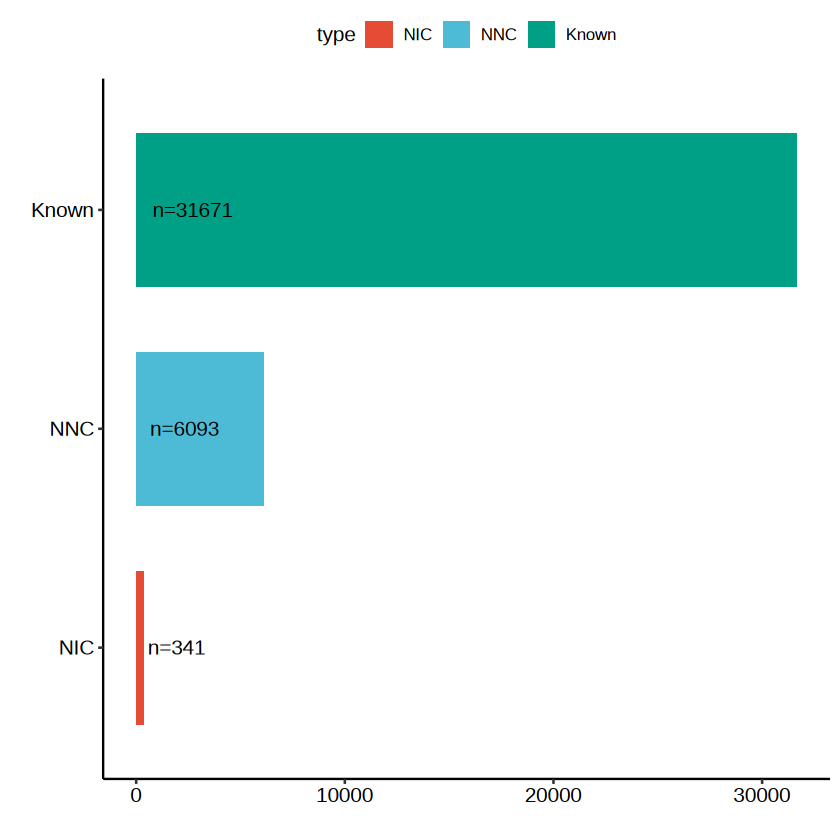

In [7]:
#isoform stat
trannovel = gtfinfo[gtfinfo$novelGene == F,]
#trannovel = trannovel[trannovel$TXNAME %in% fsrawdp$transcript_name,]
table(trannovel$txClassDescription)
trannovel$type = "NNC"
trannovel[trannovel$txClassDescription %in% c("newWithin","newLastExon","newFirstExon","newFirstExon:newLastExon"),"type"] = "NIC"
trannovel[trannovel$txClassDescription == "annotation","type"] = "Known"
#trannovel[trannovel$txClassDescription == "allNew","type"] = "NNC_all"
library(ggplot2)
library(ggpubr)
trannovelst = trannovel %>% group_by(type) %>% summarise(number = n())
trannovelst = trannovelst[order(trannovelst$number,decreasing = F),]
trannovelst$type = factor(trannovelst$type,levels = trannovelst$type)
p1 = ggplot(trannovelst,aes(y = type,x = number,fill = type)) + 
    geom_bar(stat = "identity",width = 0.7) + 
    geom_text(aes(y = type,x = 0,label = paste0("n=",number)),
              hjust = -0.2) +
    xlab("") + ylab("") +
    scale_fill_npg() +
    theme_pubr() 
p1
ggexport(p1,filename = "result/figure1/bambu_novel_isoform_stat_bar_25_10_13.pdf",
           width = 4,height = 4)

In [ ]:
 #isoform number stat
genest = fsraw.cor %>% group_by(gene_id) %>% summarise(readnum = length(unique(readid)))
genest = genest[order(genest$readnum,decreasing = T),]
  #total basic number stat
isoformst = fsraw.cor[fsraw.cor$gene_id %in% genest[genest$readnum > 100,
                                                     ]$gene_id,] %>% 
    group_by(gene_id) %>% 
    summarise(trannum = length(unique(transcript_id)))
  
  mtransnum = mean(isoformst$trannum)
isoformst1 = as.data.frame(table(isoformst$trannum))

isoformst1$prop = isoformst1$Freq/sum(isoformst1$Freq)
isoformst1f = isoformst1[as.numeric(isoformst1$Var1) <= 15,]
isoformst1f2 = isoformst1[as.numeric(isoformst1$Var1) > 15,]
isoformst1 = rbind(isoformst1f,data.frame("Var1" = ">15",
                                            "Freq" = sum(isoformst1f2$Freq),
                                            "prop" = sum(isoformst1f2$prop)))
isoformst1$prop = round(isoformst1$prop,3)*100
  
  pis1 = ggplot(isoformst1,aes(x = Var1,y = Freq,fill = Var1)) + 
    geom_bar(stat = "identity") +
    scale_y_continuous(limits = c(0,6500)) +
    geom_text(aes(label = prop),hjust = 0,angle = 90) +
    ggtitle(paste0("Mean isoform number = ", round(mtransnum,3))) +
    scale_fill_viridis(discrete = T,option = "A")+ xlab("") + 
    ylab("Gene number") +
    theme_pubr() +theme(legend.position = "none")
  pis1
  ggexport(pis1,filename = "result/figure1/bam_iso_basic_stat1_isoform_number_gene_100read_25_10_10.pdf",
           width = 5,height = 4)